In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [2]:
goods = pd.read_csv('goods.csv')
client = pd.read_csv('client.csv')
account = pd.read_csv('account.csv')

display(goods)
display(client)
display(account)

,id_t,name,price,is_petrol
0,1,chocolate,10,no
1,2,A95,40,yes
2,3,water,20,no
3,4,A92,35,yes
4,5,disel,39,yes


,id_k,surname
0,1,ivanov
1,2,petrov
2,3,sidorov


,date,id_t,id_k,quantity
0,2024-01-01,1,1,2
1,2024-01-01,2,1,1
2,2024-01-02,4,2,1
3,2024-01-02,5,3,4
4,2024-01-03,3,2,1


In [3]:
data = pd.merge(account, client, on='id_k', how='inner')
data = pd.merge(data, goods, on='id_t', how='inner')
print(data)

         date  id_t  id_k  quantity  surname       name  price is_petrol
0  2024-01-01     1     1         2   ivanov  chocolate     10        no
1  2024-01-01     2     1         1   ivanov        A95     40       yes
2  2024-01-02     4     2         1   petrov        A92     35       yes
3  2024-01-02     5     3         4  sidorov      disel     39       yes
4  2024-01-03     3     2         1   petrov      water     20        no


In [4]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

grouped_data = data.groupby(['date', 'name']).sum()

grouped_data['total'] = 0  

grouped_data['total'] = grouped_data['quantity'] * grouped_data['price']
# Зміна значень 'total', якщо кількість більше 3 і 'is_petrol' == 'yes'
grouped_data.loc[(grouped_data['quantity'] >= 3) & (grouped_data['is_petrol'] == 'yes'), 'total'] = grouped_data['quantity'] * 1.05 * grouped_data['price']


display(grouped_data)


C:\Users\patry\AppData\Local\Temp\ipykernel_11204\3919400221.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[163.8]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  grouped_data.loc[(grouped_data['quantity'] >= 3) & (grouped_data['is_petrol'] == 'yes'), 'total'] = grouped_data['quantity'] * 1.05 * grouped_data['price']


id_t  id_k  quantity  surname  price is_petrol  total
date       name                                                            
2024-01-01 A95           2     1         1   ivanov     40       yes   40.0
           chocolate     1     1         2   ivanov     10        no   20.0
2024-01-02 A92           4     2         1   petrov     35       yes   35.0
           disel         5     3         4  sidorov     39       yes  163.8
2024-01-03 water         3     2         1   petrov     20        no   20.0

In [5]:
data = grouped_data
def total_by_name():
    filtred = data.groupby('name')['total'].sum().reset_index()
    return filtred
print(total_by_name())

        name  total
0        A92   35.0
1        A95   40.0
2  chocolate   20.0
3      disel  163.8
4      water   20.0


In [6]:
def sorted():
    sorted = data.sort_values(by='quantity', ascending=False)
    display(sorted)

sorted()

id_t  id_k  quantity  surname  price is_petrol  total
date       name                                                            
2024-01-02 disel         5     3         4  sidorov     39       yes  163.8
2024-01-01 chocolate     1     1         2   ivanov     10        no   20.0
           A95           2     1         1   ivanov     40       yes   40.0
2024-01-02 A92           4     2         1   petrov     35       yes   35.0
2024-01-03 water         3     2         1   petrov     20        no   20.0

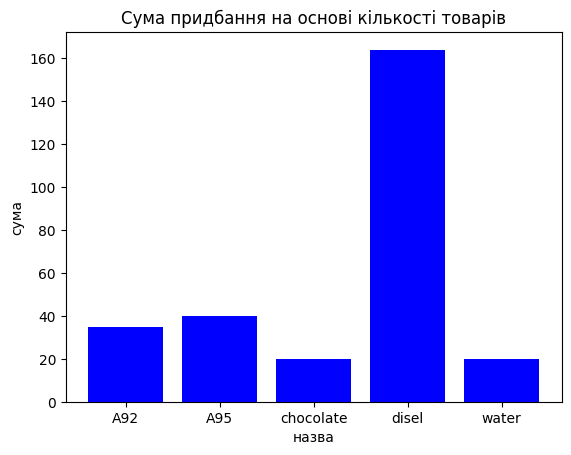

In [7]:
def bar_graph():
    filtred = total_by_name()
    plt.bar(filtred['name'], filtred['total'], color='blue')
    plt.title('Сума придбання на основі кількості товарів')
    plt.xlabel('назва')
    plt.ylabel('сума')
    plt.show()
bar_graph()

In [8]:
wd = widgets.Dropdown(
    options=data['surname'].unique(),
    value=data['surname'].iloc[0],
    description='Прізвища',
    disabled=False
)
data = data.reset_index()

def show(value):
    if value in data['surname'].values:
        filtred = data[(data['surname'] == value) & (data['quantity'] > 2) & (data['is_petrol'] == 'yes')]
        if not filtred.empty:
            print(f"{value} заправлявся більше 2 разів у дати:")
            for date in filtred['date'].dt.strftime('%Y-%m-%d'):
                print(f" - {date}")
        else:
            print(f"{value} не заправлявся більше 2 разів")
    
widget= widgets.interactive(show, value=wd)

display(widget)






interactive(children=(Dropdown(description='Прізвища', options=('ivanov', 'petrov', 'sidorov'), value='ivanov'…

In [9]:
df = pd.read_csv('client.csv')

class CLIENT:
    def __init__(self, id, surname):
        self._id=id
        self._surname=surname
    
    @property
    def id(self):
        return self._id
    
    @property
    def surname(self):
        return self._surname
    
    @id.setter
    def id(self, value):
        self._id=value
    
    @surname.setter
    def surname(self,value):
        self._surname=value

clients = [CLIENT(row['id_k'], row['surname']) for _, row in df.iterrows()]
for client in clients:
    print(f"ID: {client.id}, surname: {client.surname}")

ID: 1, surname: ivanov
ID: 2, surname: petrov
ID: 3, surname: sidorov


In [10]:
import unittest

class TestClient(unittest.TestCase):
    def setUp(self):
        self.client = CLIENT(10,'petrenko')

    def test_get_id(self):
        self.assertEqual(self.client.id, 10)
    def test_get_surname(self):
        self.assertEqual(self.client.surname, 'petrenko')
    def test_set_id(self):
        self.client.id = 11
        self.assertEqual(self.client.id, 11)
    def test_set_surname(self):
        self.client.surname = 'pavlenko'
        self.assertEqual(self.client.surname, 'pavlenko')

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)



....
----------------------------------------------------------------------
Ran 4 tests in 0.003s

OK
